In [2]:
from mpl_toolkits import mplot3d
import functions as fn
%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import levene
import matplotlib.animation as animation

In [2]:
filename = '../data/uf20-91/uf20-01.cnf'
infinite=2**31
num_vars, clauses = fn.read_problem(filename)
set_vars = [infinite]*num_vars
pop_size = 100

In [3]:
population = fn.random_population(num_vars, set_vars, pop_size)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
rand_fitness_array = [x[1] for x in pop_fitness]

TypeError: random_population() missing 1 required positional argument: 'allow_duplicates'

<IPython.core.display.Javascript object>


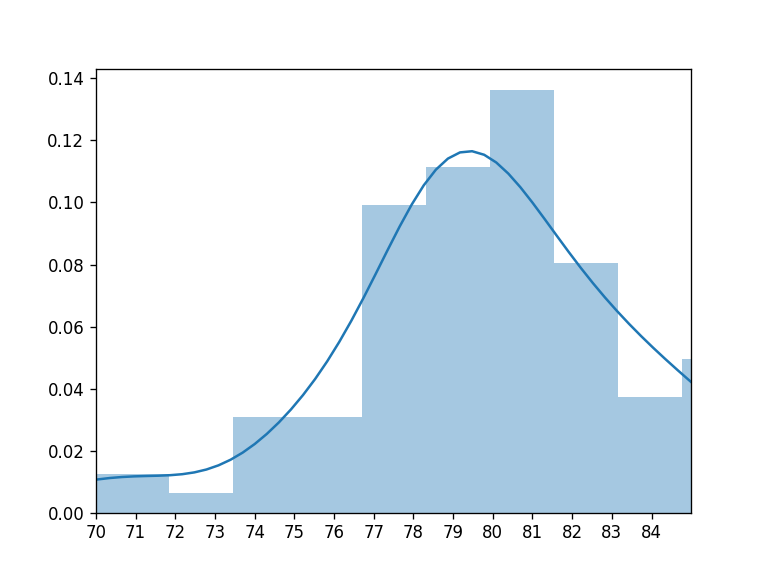

In [43]:
fig, ax = plt.subplots()
sns.distplot(rand_fitness_array, ax=ax)
ax.set_xlim(70,85)
ax.set_xticks(range(70,85))
plt.show()

In [44]:
population = fn.binary_range_population(num_vars, set_vars, pop_size)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
bin_fitness_array = [x[1] for x in pop_fitness]

<IPython.core.display.Javascript object>


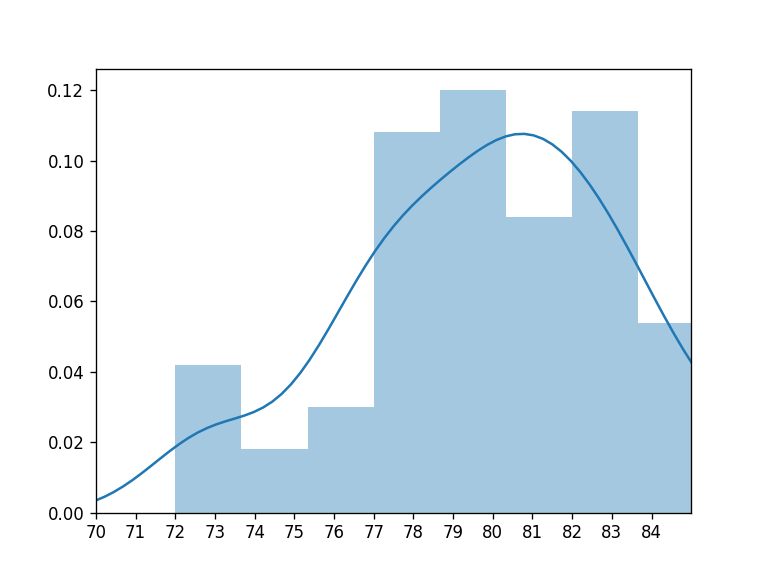

In [45]:
fig, ax = plt.subplots()
sns.distplot(bin_fitness_array, ax=ax)
ax.set_xlim(70,85)
ax.set_xticks(range(70,85))
plt.show()

In [49]:
population = fn.satisfy_clauses_population(num_vars, set_vars, pop_size, clauses)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
sc_fitness_array = []
max_f, min_f = 0, infinite
for x in pop_fitness:
    sc_fitness_array += [x[1]]
    if x[1]<min_f: min_f = x[1]
    if x[1]>max_f: max_f = x[1]

<IPython.core.display.Javascript object>


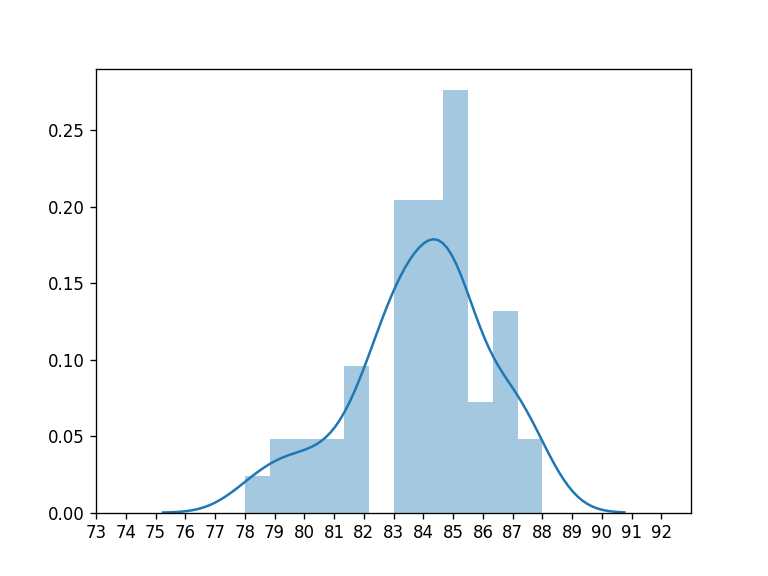

In [50]:
fig, ax = plt.subplots()
sns.distplot(sc_fitness_array, ax=ax)
ax.set_xlim(min_f-5,max_f+5)
ax.set_xticks(range(min_f-5,max_f+5))
plt.show()

In [55]:
statistic, result = levene(rand_fitness_array,bin_fitness_array)

print(statistic, result)

0.05853334072390675 0.8090796472752364


In [4]:
population = fn.random_population(num_vars, set_vars, pop_size, True)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness, {})

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(population)

principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-0.214662,-0.185022,-0.393255
1,0.253024,-0.499557,0.333630
2,-1.373273,0.034339,-0.270876
3,-0.294855,-0.824997,0.046385
4,-0.397553,-0.550654,0.428147


<IPython.core.display.Javascript object>


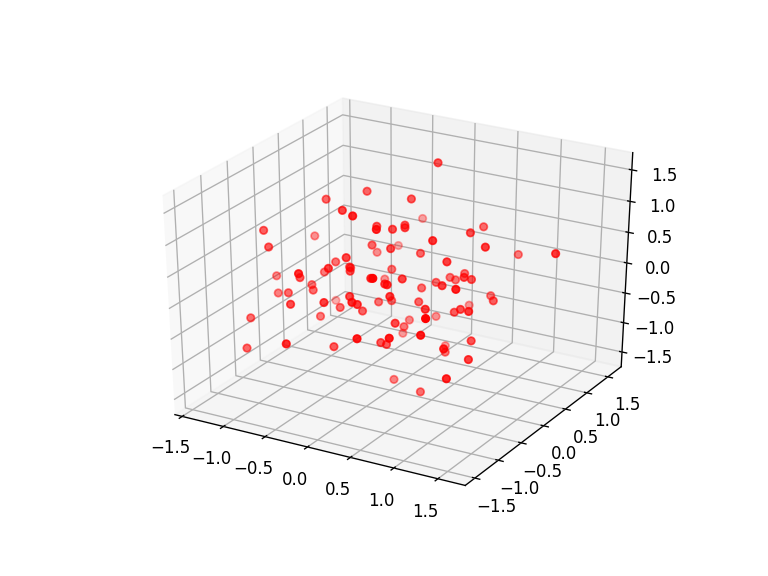

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],
           principalDf['principal component 3'], c='r', marker='o')

plt.show()

In [5]:
initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

initialComponents = pca.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = pca.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = pca.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = pca.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = pca.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = pca.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = pca.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = pca.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

pca.explained_variance_ratio_

array([0.39038667, 0.31473355, 0.22783545])

<IPython.core.display.Javascript object>


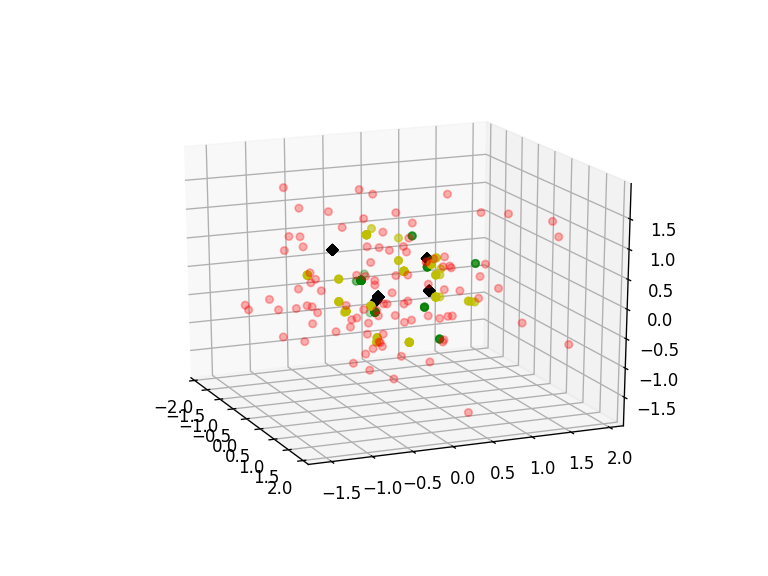

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

<IPython.core.display.Javascript object>


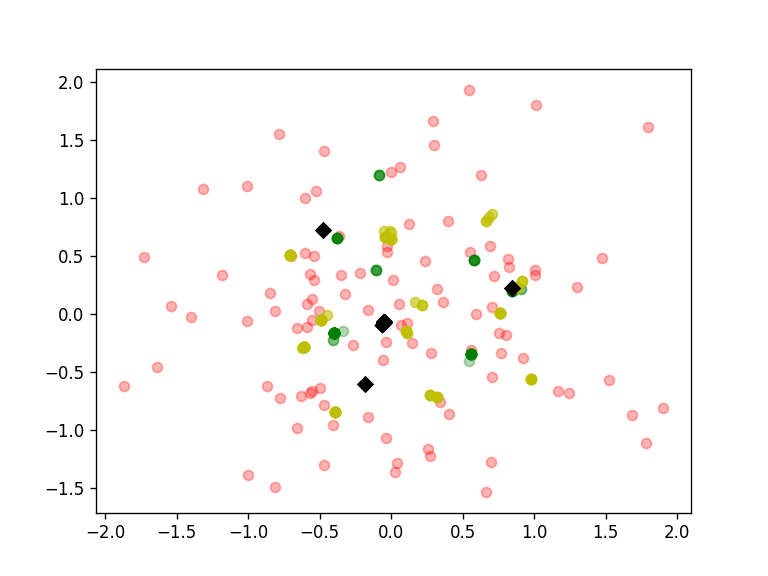

In [12]:
initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

initialComponents = pca.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2'])
comp100 = pca.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2'])

comp200 = pca.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2'])

comp300 = pca.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2'])

comp400 = pca.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2'])

comp500 = pca.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2'])

comp1000 = pca.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2'])

compfin = pca.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2'])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'], c='k', marker='D', alpha=0.9)

plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.39038667, 0.31473355])

In [3]:
# SVD decomposition

initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3)

initialComponents = svd.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = svd.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = svd.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = svd.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = svd.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = svd.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = svd.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = svd.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

<IPython.core.display.Javascript object>


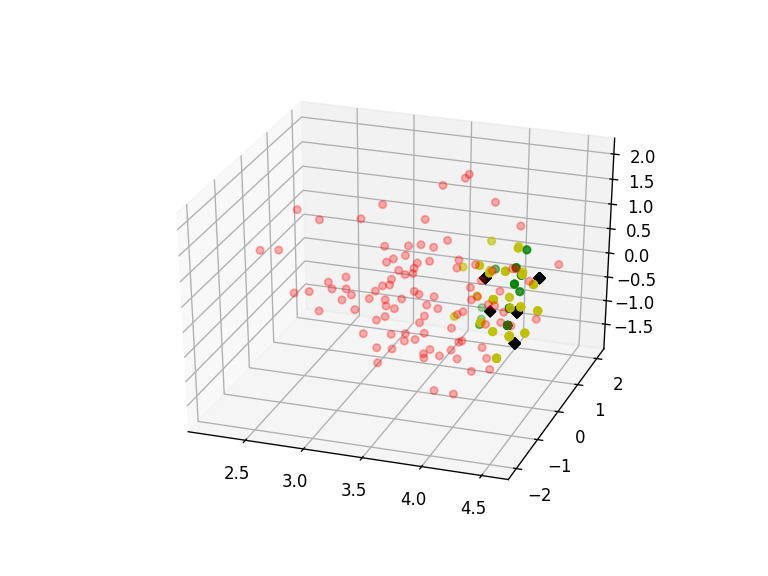

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

<IPython.core.display.Javascript object>


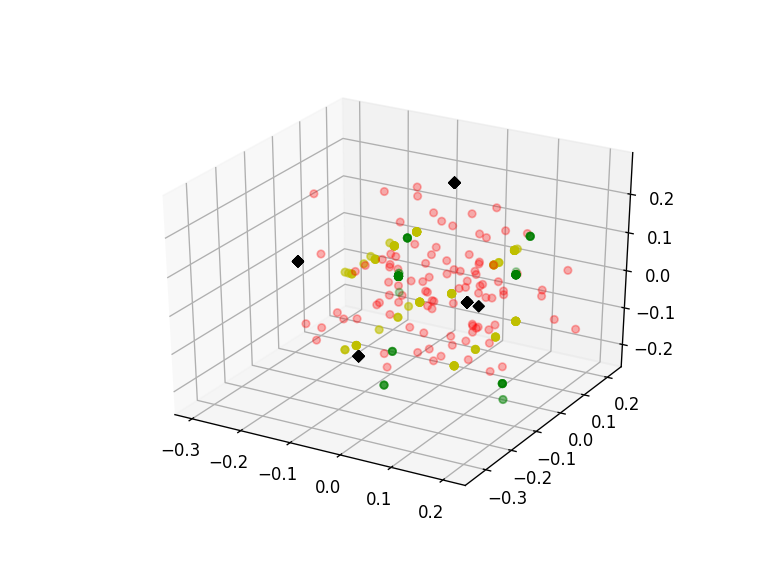

In [7]:
# FastICA

initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import FastICA

svd = FastICA(n_components=3)

initialComponents = svd.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = svd.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = svd.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = svd.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = svd.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = svd.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = svd.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = svd.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

<IPython.core.display.Javascript object>


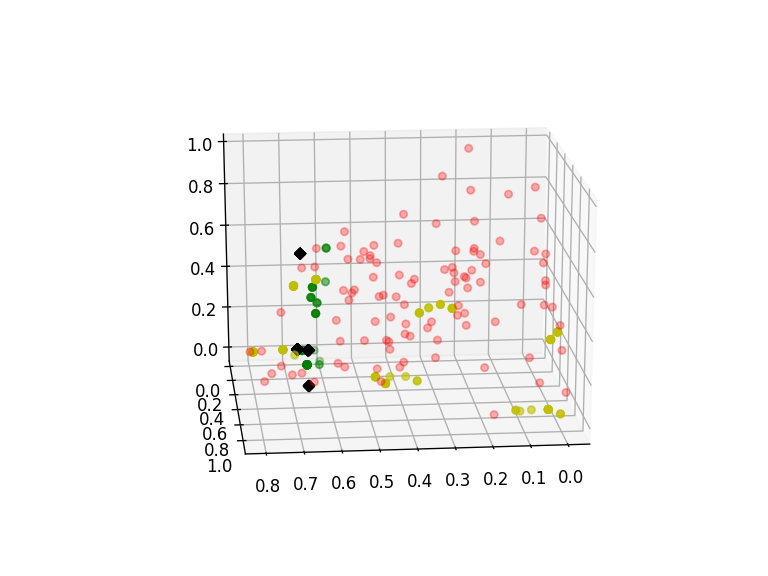

In [10]:
# NMF

initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import NMF

svd = NMF(n_components=3, max_iter=5000)

initialComponents = svd.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = svd.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = svd.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = svd.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = svd.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = svd.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = svd.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = svd.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

<IPython.core.display.Javascript object>


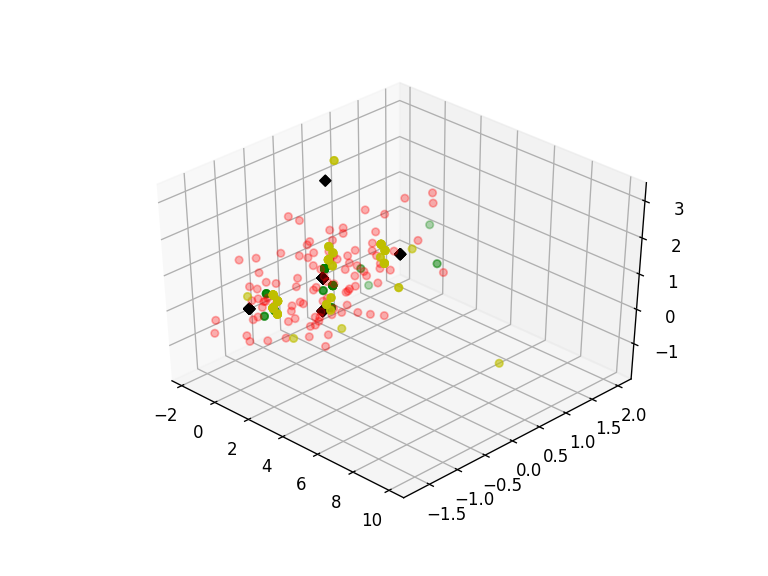

In [11]:
# FactorAnalysis

initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import FactorAnalysis

svd = FactorAnalysis(n_components=3)

initialComponents = svd.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = svd.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = svd.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = svd.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = svd.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = svd.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = svd.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = svd.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

<IPython.core.display.Javascript object>


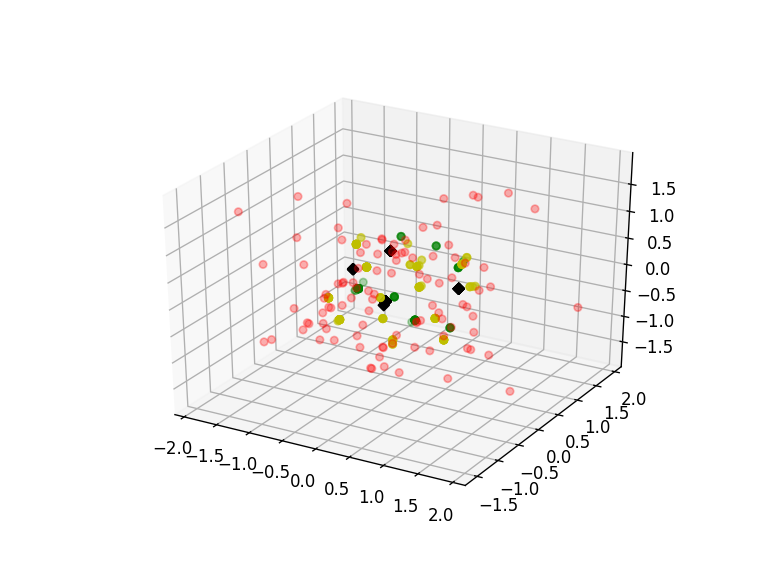

In [12]:
# KernelPCA

initial_population = [[0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1],[0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0],[1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1],[0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1],[1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1],[1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1],[0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1],[1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1],[0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0],[0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1],[1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0],[0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0],[1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0],[0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1],[1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0],[1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1],[1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1],[1,1,1,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],[1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1],[0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0],[1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0],[0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],[0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],[1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1],[1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0],[0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1],[1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1],[1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1],[0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0],[1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1],[1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1],[1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1],[0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1],[0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1],[1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1],[0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0],[1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1],[0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0],[1,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1],[1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0],[1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1],[0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1],[1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0],[1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0],[0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0],[1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1],[1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0],[1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0],[1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0],[1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1],[0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,1],[1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0],[1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1],[0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1],[1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1],[0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0],[1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1],[0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1],[1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1],[1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0],[1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0],[0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0],[1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1],[1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0],[1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1],[1,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0],[1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0],[1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0],[1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0],[0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0],[1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1],[1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1],[0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0],[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0],[0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1],[1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],[0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0],[1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1],[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0],[1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0],[0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0],[1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1]]

population_100 = [[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0],[0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1],[1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0],[1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0]]

population_200 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_300 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0]]

population_400 = [[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_500 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0]]

population_1000 = [[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0]]

final_population = [[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0],[0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0]]

from sklearn.decomposition import KernelPCA

svd = KernelPCA(n_components=3)

initialComponents = svd.fit_transform(initial_population)
initialDf = pd.DataFrame(data = initialComponents, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])
comp100 = svd.fit_transform(population_100)
df100 = pd.DataFrame(data = comp100, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp200 = svd.fit_transform(population_200)
df200 = pd.DataFrame(data = comp200, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp300 = svd.fit_transform(population_300)
df300 = pd.DataFrame(data = comp300, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp400 = svd.fit_transform(population_400)
df400 = pd.DataFrame(data = comp400, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp500 = svd.fit_transform(population_500)
df500 = pd.DataFrame(data = comp500, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

comp1000 = svd.fit_transform(population_1000)
df1000 = pd.DataFrame(data = comp1000, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

compfin = svd.fit_transform(final_population)
dffin = pd.DataFrame(data = compfin, columns=['principal component 1', 'principal component 2', 
                                                                'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(initialDf['principal component 1'],initialDf['principal component 2'],
           initialDf['principal component 3'], c='r', marker='o', alpha=0.3)


ax.scatter(df500['principal component 1'],df500['principal component 2'],
           df500['principal component 3'], c='g', marker='o', alpha=0.3)


ax.scatter(df1000['principal component 1'], df1000['principal component 2'],
           df1000['principal component 3'], c='y', marker='o', alpha=0.6)

ax.scatter(dffin['principal component 1'],dffin['principal component 2'],
           dffin['principal component 3'], c='k', marker='D', alpha=0.9)

plt.show()

In [16]:
dffin.min()


principal component 1   -0.479042
principal component 2   -0.602682
principal component 3   -0.213280
dtype: float64